# OpenCV Template Matching
Prologue to Troilus and Cressida


In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
!ls "/content/drive/MyDrive/Template Match 1623"

'a 0b.png'			't 0b.png'
'a 1b.png'			't 1b.png'
'b 0b.png'			'T and C.png'
'b 1b.png'			 tc1.png
'Bodlein TC Prologue 1623.jpg'	'TC 4 sentences source image 895.png'
'c 0b.png'			'z 0b.png'
'c 1b.png'			'z 1b.png'
'lower case templet.png'


In [41]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [42]:
# read the target image
target_file_name = input('Enter the target file name: ')
#print(target_file_name)
img = cv2.imread(target_file_name, cv2.IMREAD_COLOR)


Enter the target file name: /content/drive/MyDrive/Template Match 1623/lower case templet.png


In [43]:
# convert target from BGR to RGB
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [44]:
# and convert target from BGR to GRAY
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

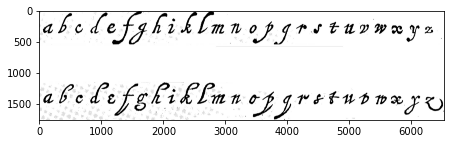

In [45]:
# and here we check the given target image
fig = plt.figure(figsize=(80,2))
plt.imshow(imgRGB)
plt.show()

In [46]:
# after that we read the template image
# template = cv2.imread("/content/drive/MyDrive/Template Match 1623/t 0b.png", 0)


# read the template image
template_file_name = input('Enter the template file name: ')
#print(target_file_name)
template = cv2.imread(template_file_name, 0)




Enter the template file name: /content/drive/MyDrive/Template Match 1623/t 0b.png


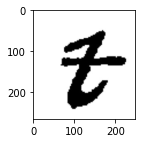

In [47]:
# and here we check the given template image
fig = plt.figure(figsize=(2,2))
plt.imshow(template, cmap="gray")
plt.show()

In [48]:
# then we get the shape of the template
w, h = template.shape[::-1]

In [49]:
# And now we can apply the template matching.
# Remember, that the size of the template should 
# be as much as possible the same, as it is size in the target image

# So, we take our image, our template and the template matching method
res = cv2.matchTemplate(imgGray,
                        template,
                        cv2.TM_CCOEFF_NORMED)

In [50]:
# Suppose we are searching for an object which has multiple occurrences.
# In that case, we will use thresholding. 
# Let's make the threshold 0.7
threshold = 0.9

In [51]:
# then we get the locations, that have values bigger, than our threshold
loc = np.where(res >= threshold)

In [52]:
# and we plot the rectangles around locations that are found
for pt in zip(*loc[::-1]):
  cv2.rectangle(imgRGB,
                pt,
                (pt[0]+w, pt[1]+h),
                (255, 0, 255),
                1)

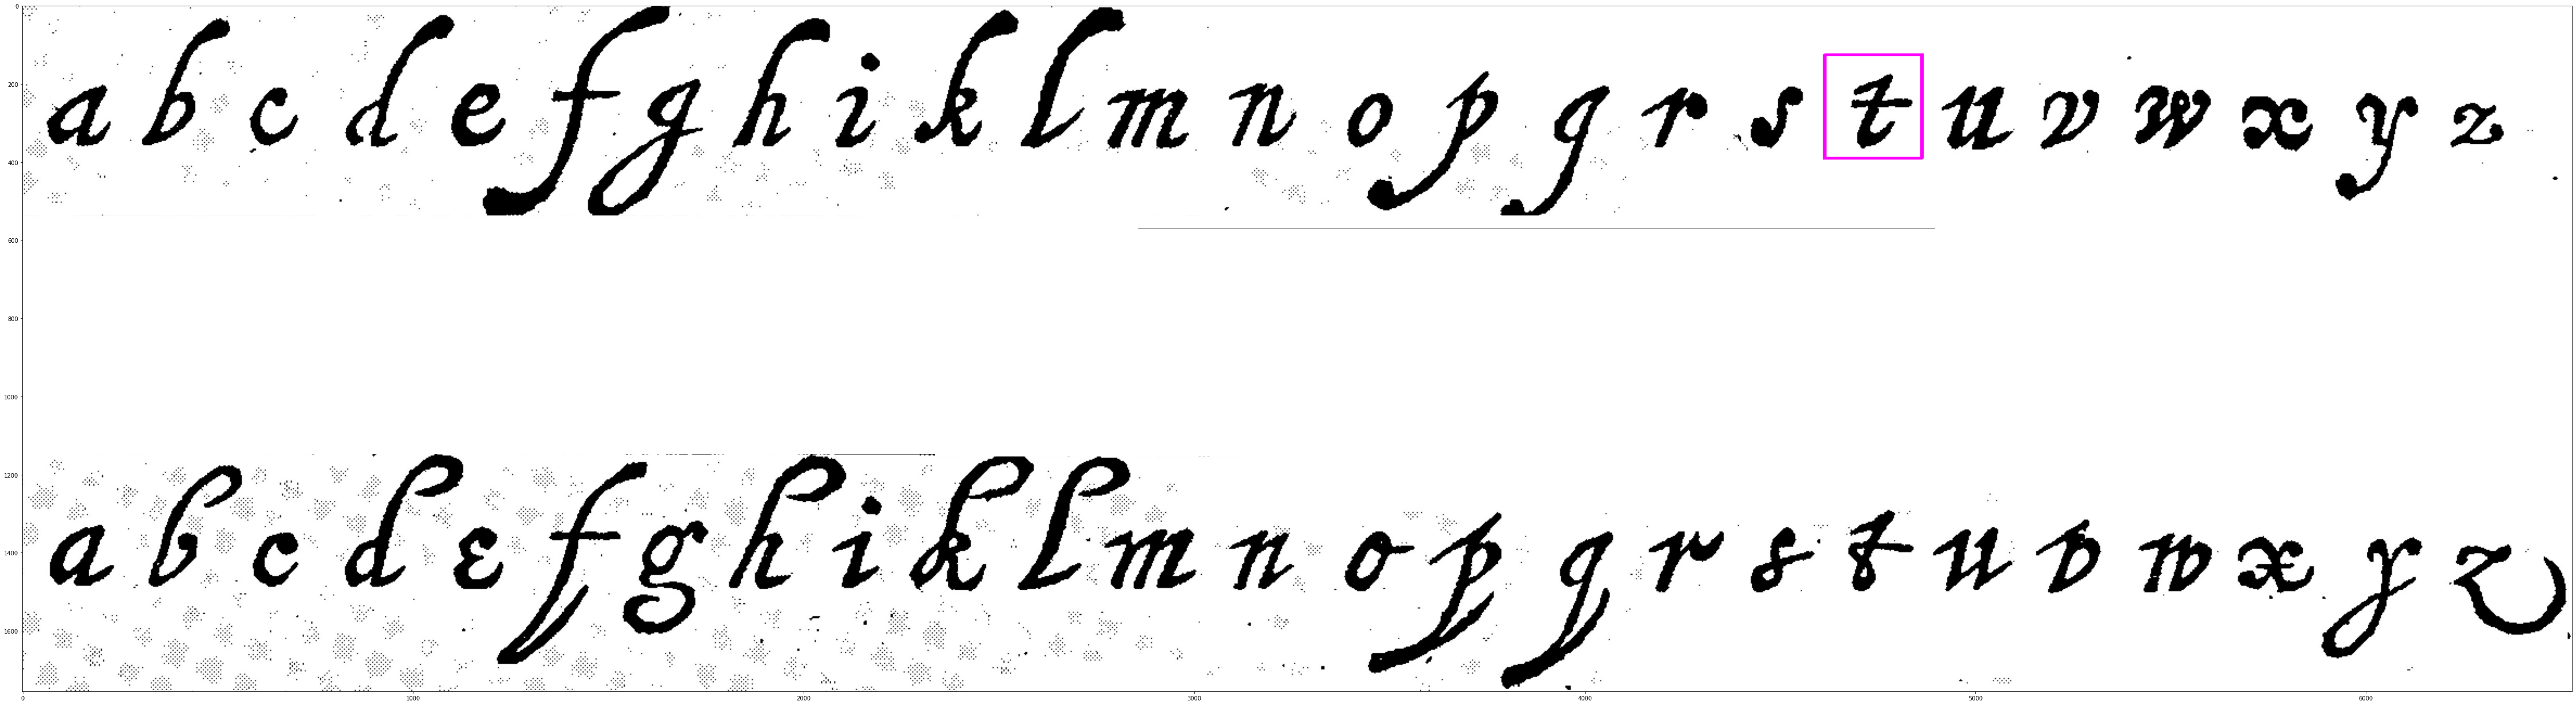

In [53]:
fig = plt.figure(figsize=(80,80))
plt.imshow(imgRGB)
# plt.show()
# plt.savefig('/content/drive/MyDrive/Template Match 1623/T and C')